<center><font size=4><b>Import necessary modules</b></font></center>
* Basic modules
* Modules for plotting
* 7 types of classifiers 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['voice.csv']


<center><font size=4><b>Read data</b></font></center>

In [2]:
data=pd.read_csv('../input/voice.csv')
data.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


<center><font size=4><b>Checking data for discrepancies</b></font></center>
* No discrepancies found

In [3]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


<center><font size=4><b>Checking for skewdness of data</b></font></center>
* Data is not skewed
* There are identical no. of entries for both labels

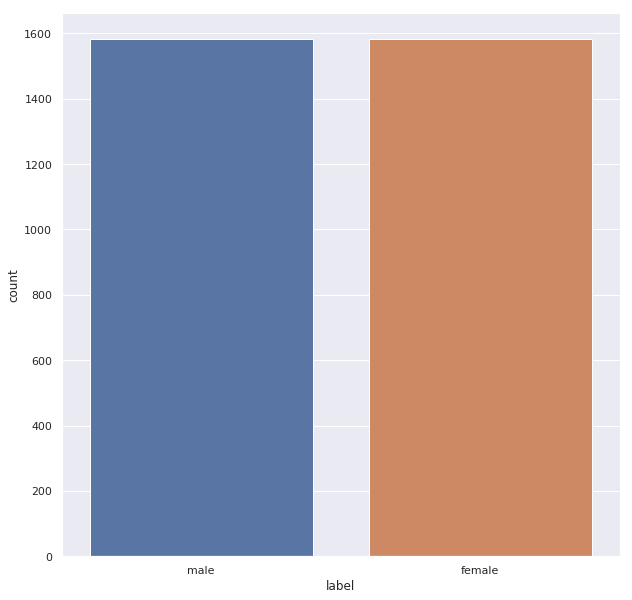

In [4]:
sns.set()
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.countplot(data['label'])
plt.show()

<center><font size=4><b>Encoding data</b></font></center>
* Male -> 1
* Female -> 0

In [5]:
data=data.replace('male',1)
data=data.replace('female',0)
data.label.sample(5)

1403    1
2199    0
510     1
1298    1
549     1
Name: label, dtype: int64

<center><font size=4><b>Co-relation of all features</b></font></center>

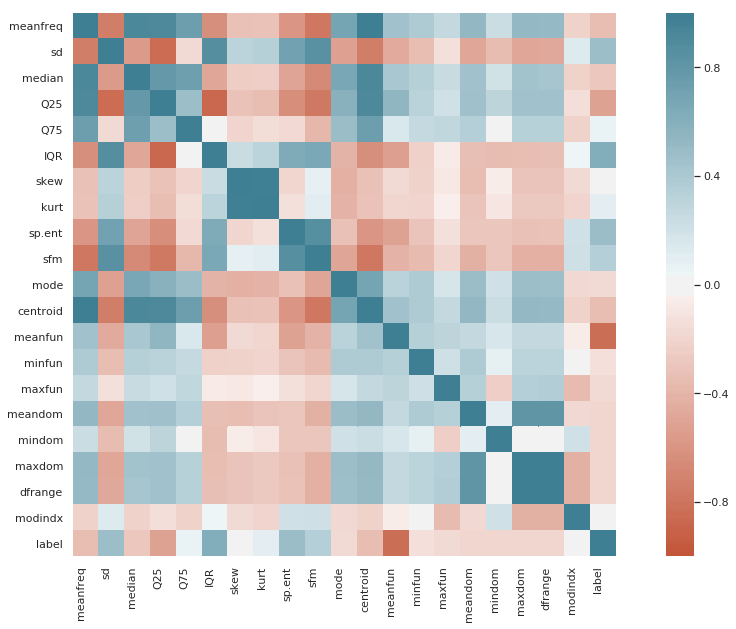

In [6]:
corr = data.corr()
fig=plt.gcf()
fig.set_size_inches(18,10)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

<center><font size=4><b>Train-Test split</b></font></center>
* 75% -> train data
* 25% -> test data

In [7]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('label',axis=1),data['label'],test_size=0.25)
x_train.shape,y_train.shape

((2376, 20), (2376,))

<center><font size=4><b>Applying models</b></font></center>

In [8]:
lr=LogisticRegression()
nb=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=2)
sgd=SGDClassifier(loss='modified_huber',shuffle=True)
dtree=DecisionTreeClassifier(max_depth=10,min_samples_leaf=15)
rfm=RandomForestClassifier(n_estimators=70)
svc=SVC(kernel='linear')
lr.fit(x_train,y_train)
nb.fit(x_train,y_train)
knn.fit(x_train,y_train)
sgd.fit(x_train,y_train)
dtree.fit(x_train,y_train)
rfm.fit(x_train,y_train)
svc.fit(x_train,y_train)
print('Accuracy of various algorithms on test data:-')
print('Logsitc Regression: '+str(lr.score(x_test,y_test)))
print('Naïve Bayes: '+str(nb.score(x_test,y_test)))
print('Stochastic Gradient Descent: '+str(sgd.score(x_test,y_test)))
print('K-Nearest Neighbours: '+str(knn.score(x_test,y_test)))
print('Decision Tree: '+str(dtree.score(x_test,y_test)))
print('Random Forest: '+str(rfm.score(x_test,y_test)))
print('Support Vector Machine: '+str(svc.score(x_test,y_test)))


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of various algorithms on test data:-
Logsitc Regression: 0.9015151515151515
Naïve Bayes: 0.8800505050505051
Stochastic Gradient Descent: 0.7121212121212122
K-Nearest Neighbours: 0.6856060606060606
Decision Tree: 0.9646464646464646
Random Forest: 0.976010101010101
Support Vector Machine: 0.9116161616161617
